(375, 500, 3)
(2, 1, 188, 250, 3)
(375, 500, 3)


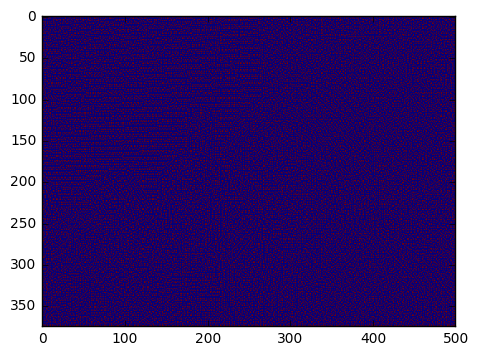

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

image = np.float32(cv2.imread('../data/VOC2012_SEG_AUG/images/2007_000346.png'))
print(image.shape)
x = tf.placeholder(tf.float32, shape=(1, None, None, None))

output, argmax = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')

def unravel_argmax(argmax, shape):
    argmax_shape = tf.shape(argmax)
    new_shape = tf.concat(0,[[2], argmax_shape])
    out = tf.zeros(new_shape)

    output_list = []
    
    output_list.append(argmax//(shape[-2]*shape[-1]))
    output_list.append(argmax%(shape[-2]*shape[-1])//shape[-1])    
    
    return tf.pack(output_list)

""""
def unravel_argmax(argmax, shape):
    new_shape = list(argmax.shape)
    new_shape.insert(0, 2)
    
    out = np.zeros(new_shape)
            
    out[0] = argmax//(shape[-2]*shape[-1])
    out[1] = argmax%(shape[-2]*shape[-1])//shape[-1]

    return out
"""

pool_map = unravel_argmax(argmax, [1, 375, 500, 3])

session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

pool_map_tf = np.asarray(pool_map.eval(feed_dict={x: [image]}))
unraveled_pool_map_tf = np.zeros_like(image)
session.close()

print(pool_map_tf.shape)
print(unraveled_pool_map_tf.shape)

for y in range(pool_map_tf.shape[2]):
    for x in range(pool_map_tf.shape[3]):
        for c in range(pool_map_tf.shape[4]):
            unraveled_pool_map_tf[pool_map_tf[0,0,y,x,c], pool_map_tf[1,0,y,x,c], c] = 255 
    
plt.figure()
plt.imshow(unraveled_pool_map_tf[:,:,0])
plt.show()

(375, 500, 3)
(4, 1, 188, 250, 3)
(375, 500, 3)


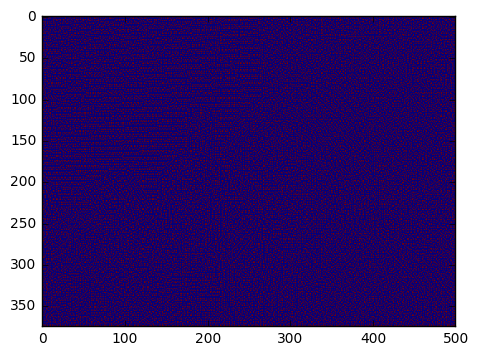

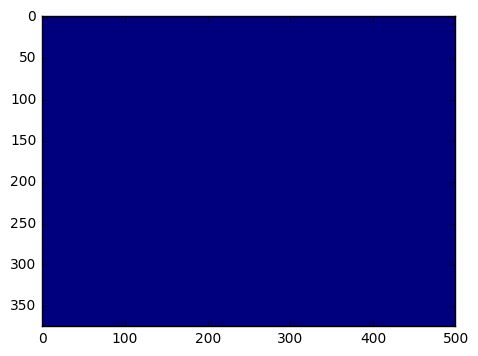

In [2]:
x_2 = tf.placeholder(tf.float32, shape=(1, None, None, None))

output = tf.nn.max_pool_with_argmax(x_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')

image = np.float32(cv2.imread('../data/VOC2012_SEG_AUG/images/2007_000346.png'))
print(image.shape)
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

output, argmax = session.run(output, feed_dict={x_2: [image]})
pool_map = np.asarray(np.unravel_index(argmax, (1, 375, 500, 3)))

session.close()

unraveled_pool_map = np.zeros_like(image)

print(pool_map.shape)
print(unraveled_pool_map.shape)

for y in range(argmax.shape[1]):
    for x in range(argmax.shape[2]):
        for c in range(argmax.shape[3]):
            unraveled_pool_map[pool_map[1,0,y,x,c], pool_map[2,0,y,x,c], c] = 255

plt.figure()
plt.imshow(unraveled_pool_map[:,:,0])
plt.show()

plt.figure()
plt.imshow(unraveled_pool_map_tf[:,:,0]-unraveled_pool_map[:,:,0])
plt.show()

In [93]:
pool_map = np.asarray(np.unravel_index(argmax, (1, 375, 500, 3)))

def unravel_argmax(argmax, shape):
    new_shape = list(argmax.shape)
    new_shape.insert(0, 2)
    
    out = np.zeros(new_shape)
            
    out[0] = argmax//(shape[-2]*shape[-1])
    out[1] = argmax%(shape[-2]*shape[-1])//shape[-1]

    return out


print(argmax.shape)
print(argmax[0,187,241,0])

print(pool_map.shape)    

print(pool_map[1,0,187,241,0])
print(pool_map[2,0,187,241,0])

pool_map_2 = unravel_argmax(argmax, (1, 375, 500, 3))

print(pool_map_2[0,0,187,241,0])
print(pool_map_2[1,0,187,241,0])
finish = False

def testEqual(pool_map, pool_map_2, argmax):
    for y in range(argmax.shape[1]):
        for x in range(argmax.shape[2]):
            for c in range(argmax.shape[3]):
                if (pool_map_2[0,0,y,x,c] != pool_map[1,0,y,x,c]) or (pool_map_2[1,0,y,x,c] != pool_map[2,0,y,x,c]):
                    print('Error at c: {} y: {} x: {}'.format(c,y,x))
                    print('{} != {} or {} != {}'.format(pool_map_2[0,0,y,x,c], pool_map[1,0,y,x,c], pool_map_2[1,0,y,x,c], pool_map[2,0,y,x,c]))
                    return False
    return True

print('np.unravel_index works like unravel_argmax: {}'.format(testEqual(pool_map, pool_map_2, argmax)))
    

(1, 188, 250, 3)
562446
(4, 1, 188, 250, 3)
374
482
374.0
482.0
np.unravel_index works like unravel_argmax: True
